In [2]:
from PIL import Image
import numpy as np
import os, shutil

In [3]:
base_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/workingDirectory'

In [4]:
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building your network

In [7]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Compile Model

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

# Data preprocessing Using ImageGenerator

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fitting the model using a batch generator

In [11]:
history = model.fit_generator(train_generator,steps_per_epoch=100,
                              epochs=30,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 82s 816ms/step - loss: 0.6909 - acc: 0.5360 - val_loss: 0.6682 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 64s 645ms/step - loss: 0.6571 - acc: 0.6105 - val_loss: 0.6509 - val_acc: 0.5970
Epoch 3/30
100/100 [==============================] - 67s 667ms/step - loss: 0.6097 - acc: 0.6690 - val_loss: 0.5864 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 64s 637ms/step - loss: 0.5625 - acc: 0.7165 - val_loss: 0.5922 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 63s 634ms/step - loss: 0.5238 - acc: 0.7350 - val_loss: 0.6475 - val_acc: 0.6540
Epoch 6/30
100/100 [==============================] - 64s 638ms/step - loss: 0.4990 - acc: 0.7470 - val_loss: 0.3881 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 64s 641ms/step - loss: 0.4672 - acc: 0.7845 - val_loss: 0.8164 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 6

# Displaying curves of loss and accuracy during training

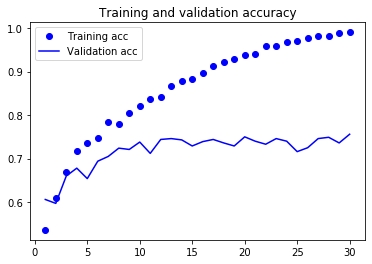

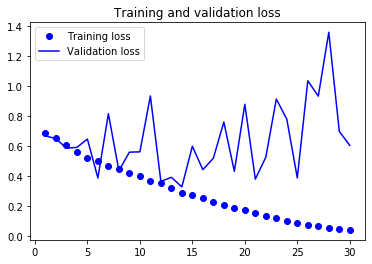

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Using data augmentation

# Defining a new convnet that includes dropout

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 102s 1s/step - loss: 0.6924 - acc: 0.5182 - val_loss: 0.6955 - val_acc: 0.5387
Epoch 2/100
100/100 [==============================] - 103s 1s/step - loss: 0.6824 - acc: 0.5578 - val_loss: 0.6917 - val_acc: 0.6018
Epoch 3/100
100/100 [==============================] - 103s 1s/step - loss: 0.6696 - acc: 0.6018 - val_loss: 0.7824 - val_acc: 0.6168
Epoch 4/100
100/100 [==============================] - 105s 1s/step - loss: 0.6578 - acc: 0.6140 - val_loss: 0.5989 - val_acc: 0.6321
Epoch 5/100
100/100 [==============================] - 108s 1s/step - loss: 0.6446 - acc: 0.6310 - val_loss: 0.5800 - val_acc: 0.6662
Epoch 6/100
100/100 [==============================] - 106s 1s/step - loss: 0.6308 - acc: 0.6514 - val_loss: 0.6955 - val_acc: 0.6108
Epoch 7/100
100/100 [==============================] - 108s 1s/step - loss: 0.6175 - acc: 0.6638 - val_loss: 0.5

100/100 [==============================] - 108s 1s/step - loss: 0.4151 - acc: 0.8141 - val_loss: 0.3173 - val_acc: 0.8286
Epoch 62/100
100/100 [==============================] - 107s 1s/step - loss: 0.4180 - acc: 0.8031 - val_loss: 0.4881 - val_acc: 0.8046
Epoch 63/100
100/100 [==============================] - 108s 1s/step - loss: 0.4134 - acc: 0.8106 - val_loss: 0.4038 - val_acc: 0.7642
Epoch 64/100
100/100 [==============================] - 107s 1s/step - loss: 0.4126 - acc: 0.8131 - val_loss: 0.4492 - val_acc: 0.7957
Epoch 65/100
100/100 [==============================] - 107s 1s/step - loss: 0.3920 - acc: 0.8251 - val_loss: 0.3087 - val_acc: 0.7881
Epoch 66/100
100/100 [==============================] - 105s 1s/step - loss: 0.4145 - acc: 0.8125 - val_loss: 0.6188 - val_acc: 0.7680
Epoch 67/100
100/100 [==============================] - 112s 1s/step - loss: 0.4008 - acc: 0.8128 - val_loss: 0.4637 - val_acc: 0.8001
Epoch 68/100
100/100 [==============================] - 116s 1s/step

# Displaying curves of loss and accuracy during training

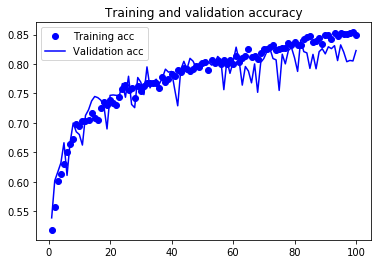

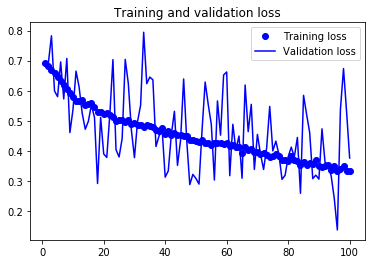

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [19]:
model.save("Cats_and_Dogs_Model.h5")